# Leture 02 | Bayesian Reasoning in Machine Learning
-----

Lecture 2 of [ES 661 Probabilistic Machine Learning](https://nipunbatra.github.io/pml2023/) by [Nipun Batra](https://nipunbatra.github.io/)

In [8]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from tueplots import bundles
plt.rcParams.update(bundles.beamer_moml())
plt.rcParams.update({"figure.dpi": 180})

# add despine to the bundle using rcParams
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False

# increase font size to match beamer template
plt.rcParams['font.size'] = 12

# make backgorund transparent
plt.rcParams['figure.facecolor'] = 'none'

## Problem 1: Is Steve a farmer of a librarian?

Steve is very shy and withdrawn, invariably helpful but with very little interest in people or reality. A **meek and tidy soul**, he has a need for order and structure, and a passion for detail. Is Steve a librarian or farmer?

Depending on how one looks at the problem, one may come with different, yet plausible answers: 

**Likelihood**
If one considers the given information only, or the description in this case, one may ask, 
- How well does this description fit a librarian? that is, $P(\text{Description}| \text{Librarian})=\text{?}$, or 
- How well does this description fit a farmer? that is, $P(\text{Description}| \text{Farmer})=\text{?}$

Suppose 
\begin{align*}
P(\text{Description}| \text{F})&= 0.1\\
P(\text{Description}| \text{L})&= 0.4\\
\end{align*}
where $F$ stands for farmer and $L$ si librarian, then clearly, by just looking/considering the observations/data only, the answer is that Steve is a librarian, because the _likelihood_ is maximized there. 

**Prior**
But if one was to look at the distribution of Librarians and Farmers, and suppose they find that the ratio of librarians to farmers is $1/20$, that is
$$
\frac{\text{librarian}}{\text{farmer}} = \frac{1}{20}
$$
and looking at this _prior_ information only, one is likely to conculde that Steve is a farmer. 

**Posterior**
But what about if we combine both the likelihood? We get meaningful inference!
$$
\text{posterior} = \frac{\text{likelihood} \times \text{prior}}{\text{all possible explanations (evidence)}}
$$

In [2]:
p_librarian = 1.0/ 21.0
p_farmer = 1 - p_librarian

prior = torch.distributions.Categorical(
    probs=torch.tensor([p_librarian, p_farmer])
)
prior

Categorical(probs: torch.Size([2]))

Text(0.5, 1.0, 'Prior')

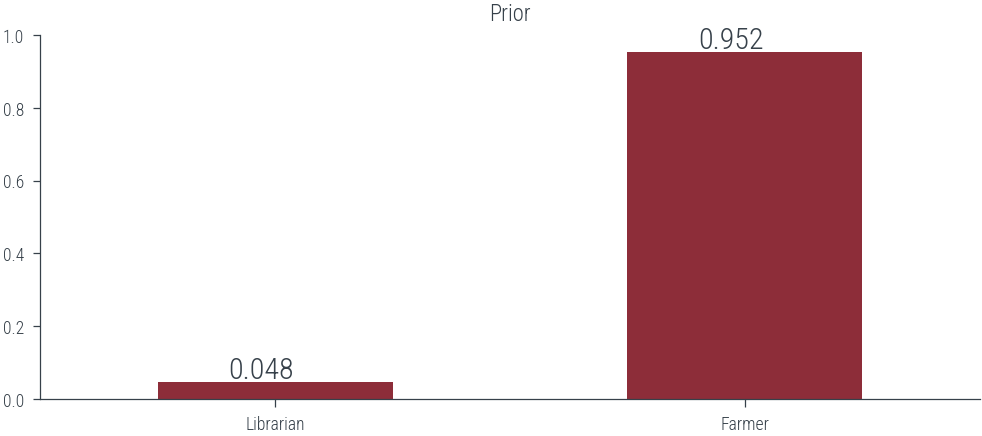

In [9]:
pd.Series(index=["Librarian", "Farmer"], data=prior.probs).plot(
    kind="bar", rot=0
)

for i, v in enumerate(prior.probs):
    plt.text(i-0.1, v+0.01, f"{v.item():0.3f}")

plt.title("Prior")

In [4]:
# get 210 samples from the prior given a seed

torch.manual_seed(3)
samples = prior.sample(torch.Size([210, ]))

print(samples)
print(samples.sum())

tensor([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
        1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
tensor(199)


In [5]:
p_likelihood_librarian = torch.tensor(0.4)
p_likelihood_farmer = torch.tensor(0.1)

# posterior = (likelihood * prior) / evidence (all possible explanations)
evidence = (p_likelihood_librarian * p_librarian + 
            p_likelihood_farmer * p_farmer)

p_librarian_posterior = \
    (p_likelihood_librarian * p_librarian) / evidence

p_farmer_posterior = \
    (p_likelihood_farmer * p_farmer) / evidence

p_librarian_posterior, p_farmer_posterior

(tensor(0.1667), tensor(0.8333))

So Steve is likely to be a farmer!

## Problem 2: Electricity consumption

Suppose we want to model electricity consumption in a university residence by a line:
$$y = \theta_0 + \theta_1 x + \epsilon, \qquad \epsilon \sim \mathcal{N}(0, \sigma^2)$$

We can interpret the parameters as 
- $\theta_0$ - Base load, and 
- $\theta_1$ - Consumption per student ($> 0$)

To reason about this, we can make noninformative piors
\begin{align*}
p(\theta_0) &= \text{Uniform(80, 100)} \\
p(\theta_1) &= \text{Uniform(1, 2)} 
\end{align*}

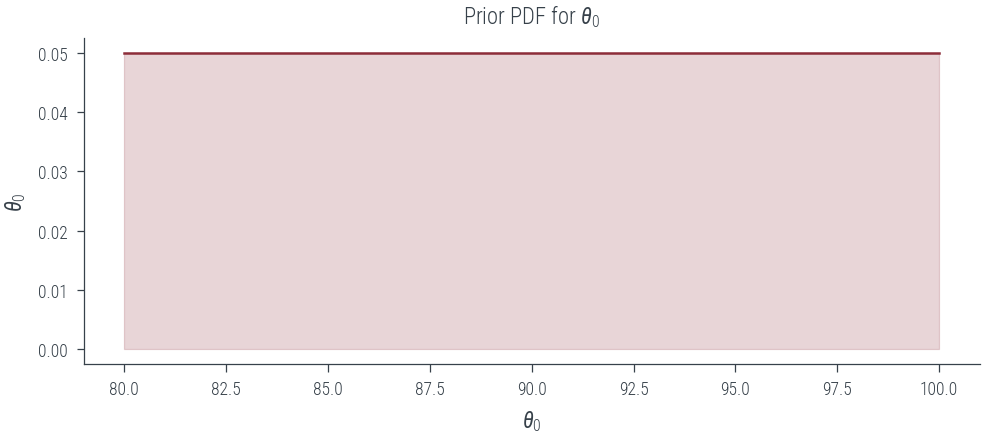

In [10]:
prior_theta_0 = torch.distributions.Uniform(80, 100)
prior_theta_1 = torch.distributions.Uniform(1, 2)

eps = 1E-3
theta_0_lin = torch.linspace(80+eps, 100.0-eps, 100)

plt.plot(theta_0_lin, torch.exp(prior_theta_0.log_prob(theta_0_lin)))
plt.xlabel(r"$\theta_0$")
plt.ylabel(r"$\theta_0$")
plt.title(r'Prior PDF for $\theta_0$')
# Fill between 
plt.fill_between(theta_0_lin, torch.exp(prior_theta_0.log_prob(theta_0_lin)), color='C0', alpha=0.2)

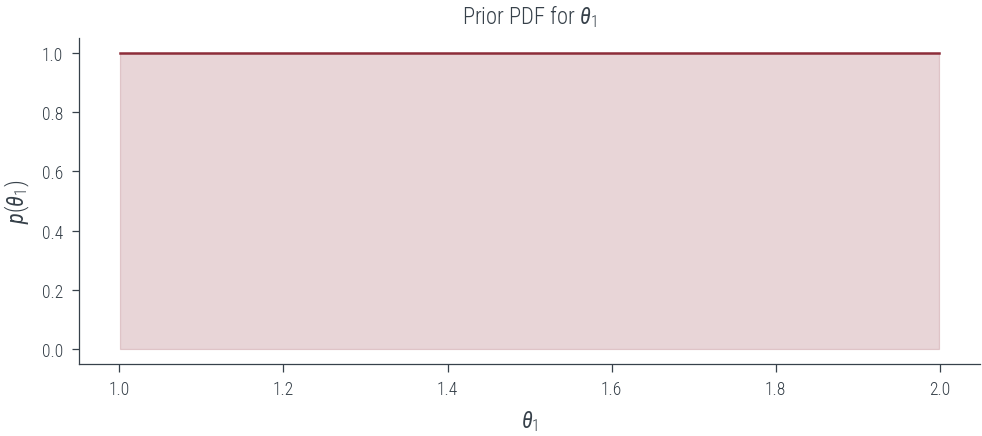

In [11]:
theta_1_lin = torch.linspace(1+eps, 2.0-eps, 100)
plt.plot(theta_1_lin, torch.exp(prior_theta_1.log_prob(theta_1_lin)))
plt.xlabel(r'$\theta_1$')
plt.ylabel(r'$p(\theta_1)$')
plt.title(r'Prior PDF for $\theta_1$')
# Fill between 
plt.fill_between(theta_1_lin, torch.exp(prior_theta_1.log_prob(theta_1_lin)), color='C0', alpha=0.2)

### Sampling


Text(0.5, 1.0, '$\\theta_0$')

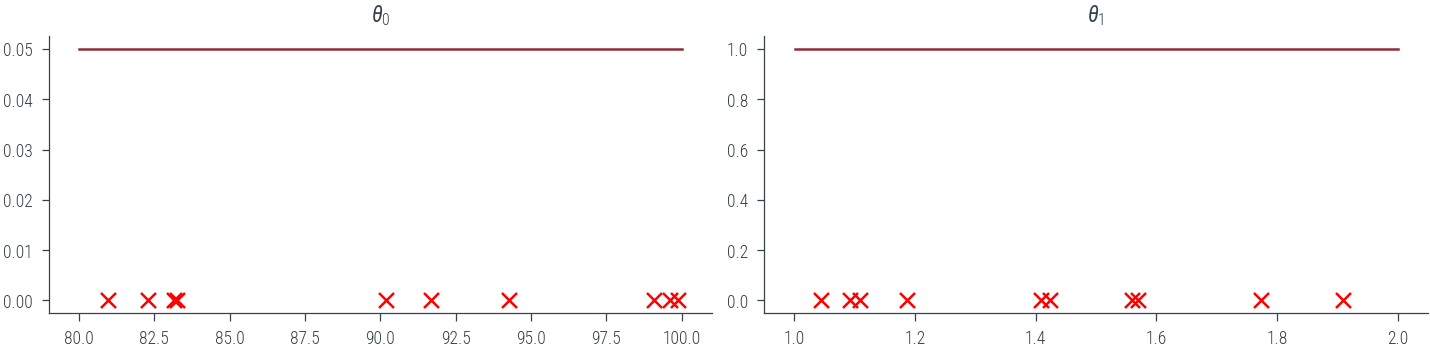

In [16]:
n_samples = 10
theta_0s = prior_theta_0.sample(torch.Size([n_samples,]))
theta_1s = prior_theta_1.sample(torch.Size([n_samples,]))

# Plot the samples
fig, ax = plt.subplots(figsize=(8, 2), ncols=2)
ax[0].plot(theta_0_lin, torch.exp(prior_theta_0.log_prob(theta_0_lin)), label='prior')

# plot theta_0 samples
ax[0].scatter(theta_0s, torch.zeros_like(theta_0s),  label='samples',c='r', marker='x')

ax[1].plot(theta_1_lin, torch.exp(prior_theta_1.log_prob(theta_1_lin)), label='prior')
ax[1].scatter(theta_1s, torch.zeros_like(theta_1s), label='samples',c='r', marker='x')

ax[1].set_title(r'$\theta_1$')
ax[0].set_title(r'$\theta_0$')

Text(0, 0.5, 'Electricity Consumption')

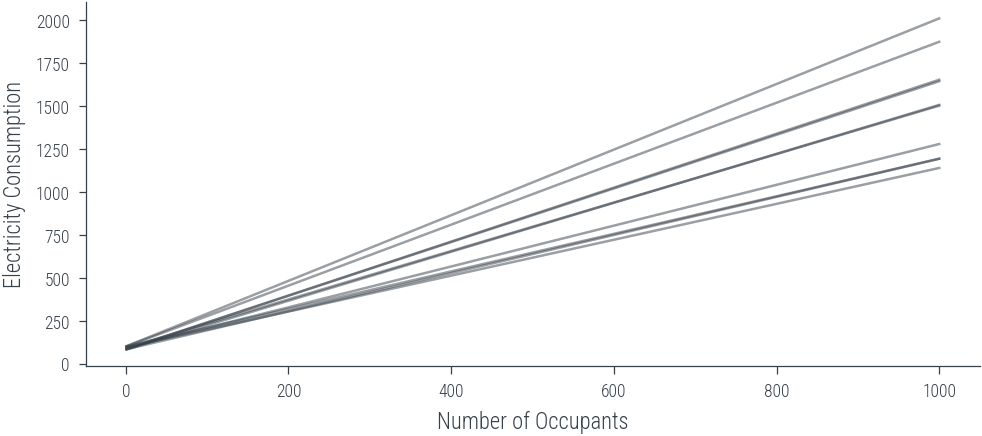

In [17]:
# Generating draws from prior

xs = torch.linspace(1, 1000, 100)
def forward(x, theta_0, theta_1):
    return theta_0 + theta_1 * x

preds = []

for theta_0, theta_1 in zip(theta_0s, theta_1s):
    # print(theta_0.item(), theta_1.item())
    preds.append(forward(xs, theta_0, theta_1))
    plt.plot(xs, preds[-1], color='C1', alpha=0.5)

plt.xlabel('Number of Occupants')
plt.ylabel('Electricity Consumption')

## The predictive distribution

Suppose we have a test point $x^*$, we may wish to find the distribution of the response on that test point $p(y^* | x^*)$. But from the model, $y$ and $x$ are related by paramenters $\mathbf{\theta}$, so how do we infer $y^*$? 

Also, $\mathbf{\theta}$ has a distrinution, we don't know which specific value of $\mathbf{\theta}$ to make inference, so what do we do? Introduce $\mathbf{\theta}$ and marginalize it over all possible values of $\mathbf{\theta}$ (Sum Rule), and you get the predictive distribution:

\begin{align*}
p(y^* | x^*) &= \int_{\theta\in\Theta} p(y^*, \theta | x^*)\,d\theta \qquad \text{marginalization} \\
            &= \int_{\theta\in\Theta} p(y^* | \theta, x^*)p(\theta)\,d\theta \qquad \text{product rule}\\
            & \approx \frac{1}{S} \sum_{s=1}^{S} p(y^* | \theta_s, x^*)p(\theta_s) \qquad \text{Monte Carlo estimation}
\end{align*}

- If $\theta_s$ is drawn from the prior distrubution, then the predictive distribution is called **prior predictive**
- If $\theta_s$ is drawn from the posterior distrubution, then the predictive distribution is called **posterior predictive**